# Heat resistance example
An example of using and iterative solver in a thermal resistance problem.

```{exercise}
:label: iterative_solver
Implement an iterative solver to determine the thicknesses of a steel plate and a sand mould given the thermal properties and boundary conditions. Use the provided data to set up the problem and iteratively solve for the thicknesses until convergence is achieved.
| Sand Mould | Steel Plate | Other Data |
|------------|--------------|-------------|
| $k_{sand} = 0.6 W/m/K$ | $k_{steel} = 45 W/m/K$ | Total Thickness = 0.15 m |
| $T_{surface} = 62 \degree C$ | $T_{hot} = 1000 \degree C$ | $h = 200 W/m^2/K$ |
| | | $T_{ambient} = 25 \degree C$ |
```{figure} iterative_solver_diagram.png
---
width: 400px
name: iterative_solver_diagram
---
Schematic of the steel plate and sand mould system.
```

We know the flux at the surface of the sand mould, we know the temperature of the hot face of the steel plate, and we know the total dimensions of the steel plate and sand mould (the system dimension).
We want to know the dimensions of the steel plate and sand mould in the system.

In [61]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Given values
k_steel = 45.0 # W/m/K
k_sand = 0.6 # W/m/K
T_steel_hot = 1000.0 # C
q_sand_surface = 200.0 # W/m^2
T_sand_surface = 62.0 # C
T_ambient = 25.0 # C
total_thickness = 0.15 # m
hi = 200.0 # W/m^2/K

# Initial guesses for thicknesses
thickness_sand = 0.001 # m
thickness_steel = total_thickness - thickness_sand

```{tip} Using Functions
Using functions can help modularize your code and make it more readable. Here, we define a function to calculate the heat flux based on the thicknesses of the sand mould and steel plate.
```

In [63]:
# Let us create a function to calculate the heat flux based on thicknesses
def calculate_heat_flux(thickness_sand, thickness_steel):
    R_steel = thickness_steel / k_steel
    R_sand = thickness_sand / k_sand
    R_total = R_steel + R_sand
    q_calculated = (T_steel_hot - T_sand_surface) / R_total
    return q_calculated

```{note} Relaxation Factor
A relaxation factor can help stabilize the convergence of the iterative solver. A value of 1.0 means no relaxation, while values less than 1.0 can help dampen oscillations in the solution.
```

In [64]:
# Iterative solver parameters
tolerance = 1e-5
max_iterations = 1000
relaxation_factor = 1.0

# Set Design Constraint target surface heat flux
q_target = hi * (T_sand_surface - T_ambient)

# Step size
step_size = 0.00001 # m
errors = []
thickness_sand_history = []

```{hint} Print Statements
Including print statements within the iterative loop can help track the progress of the solver and diagnose convergence issues. They are also useful for debugging!
```

In [65]:
# Iterative solver loop
for iteration in range(max_iterations):
    thickness_sand_history.append(thickness_sand)
    # Calculate heat flux based on current thicknesses
    q_calculated = calculate_heat_flux(thickness_sand, thickness_steel)
    # Calculate error
    residual = q_calculated - q_target
    errors.append(residual)
    # Check for convergence
    if abs(residual) < tolerance:
        print(f"Converged in {iteration} iterations.")
        break
    # Update thickness of sand mould based on error


    if iteration > 0:
        step_size = thickness_sand_history[-1] - thickness_sand_history[-2]
        residual_gradient = (errors[iteration] - errors[iteration - 1]) / step_size
        thickness_sand -= relaxation_factor * (errors[iteration] / (residual_gradient + 1e-6))
    else:
        step_size = 0.00001
        thickness_sand += step_size
    thickness_steel = total_thickness - thickness_sand

# Output results
print(f"Thickness of sand mould: {thickness_sand:.4f} m")
print(f"Thickness of steel plate: {thickness_steel:.4f} m")
print(f"Calculated heat flux: {q_calculated:.2f} W/m^2")

Converged in 14 iterations.
Thickness of sand mould: 0.0751 m
Thickness of steel plate: 0.0749 m
Calculated heat flux: 7400.00 W/m^2


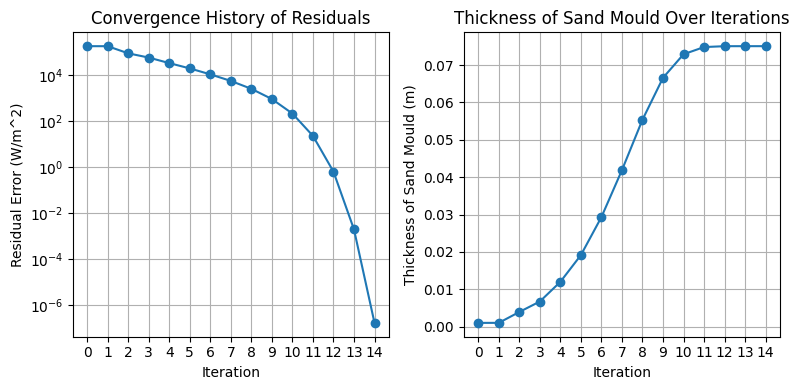

In [66]:
# Plot convergence history
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(errors, marker='o')
axs[0].set_title('Convergence History of Residuals')
axs[0].set_yscale('log')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Residual Error (W/m^2)')
# set xticks to be integers from 0 to len(errors)
axs[0].set_xticks(range(0, len(errors)))
axs[0].grid(True)
axs[1].plot(thickness_sand_history, marker='o')
axs[1].set_title('Thickness of Sand Mould Over Iterations')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Thickness of Sand Mould (m)')
axs[1].set_xticks(range(0, len(errors)))
plt.tight_layout()
plt.grid(True)
plt.show()